In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm
import warnings

In [2]:
warnings.filterwarnings("ignore")

Download the dataset

In [3]:
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


1. Replace the NaN values with correct value

In [4]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(fill_value=0,strategy='constant')
imputer.fit(dataset[['salary']])
data=imputer.transform(dataset[['salary']])
dataset[['salary']]=pd.DataFrame(data)

In [5]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


2. How many of them are not placed

In [6]:
Placement_count=(dataset['status']=='Not Placed').sum()
print("Total number of students who are not placed:",Placement_count)

Total number of students who are not placed: 67


3. Find the reason for non placement from the dataset.

We are not able to plot the reason for the non-placement as there exists on relationship between 
student's academic performance/Gender/work experience/specialisation and placement.

4. Kind of relation between mba_p and salary

In [8]:
dataset=dataset.drop('sl_no',axis=1)

In [9]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


The relation between mba_p and salary is 14% which indicates a low degree of positive correlation.
There is a minimal positive relationship between the two variables. Hence we cannot define any significant conclusion about the relationship. 

5. Which specialisation is getting minimum salary?

In [10]:
min_salary=dataset.loc[dataset['salary']==dataset['salary'].min(),'specialisation']
print("Students specialised in the departments {} are getting minimum salary.".format(min_salary.unique()))

Students specialised in the departments ['Mkt&HR' 'Mkt&Fin'] are getting minimum salary.


6. How many of them are getting salary above 500000

In [11]:
print("Number of students getting salary more than Rs.500000:",(dataset['salary']>500000).sum())

Number of students getting salary more than Rs.500000: 3


7. Test the Analysis of variance between etest_p and mba_p at significance level 5%

In [12]:
from scipy.stats import f_oneway
f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

pValue is greater than 0.05. In this case, the result is not statistically significant and We have to accept the null hypothesis.
The observed difference is due to random chance and not the original difference between the groups.

8. Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level 5%

In [13]:
from scipy.stats import ttest_ind
degree=dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree,specialisation)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

pValue is less than 0.05. In this case, the result is statistically significant and we can reject the null hypothesis/accept the alternate hypothesis.
In this case, we conclude that there is a significant difference between the groups compared.

9. Convert the normal distribution to standard normal distribution for salary column.

<Axes: xlabel='salary', ylabel='Density'>

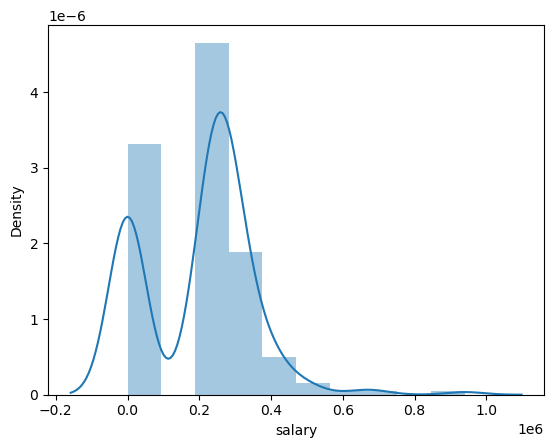

In [14]:
import seaborn as sns
sns.distplot(dataset['salary'])

In [15]:
def std_norm(dataset):
    import seaborn as sns
    mean=dataset.mean()
    sd=dataset.std()
    values=[value for value in dataset]
    z_score=[((x-mean)/sd) for x in values]
    sns.distplot(z_score,kde='True')
    return z_score,mean

([0.46063604819739223,
  0.008383942686872693,
  0.33142116090867235,
  -1.283764930200326,
  1.4620514246849712,
  -1.283764930200326,
  -1.283764930200326,
  0.34434264963754435,
  0.20866701798438847,
  -1.283764930200326,
  0.3960286045530323,
  0.33142116090867235,
  -1.283764930200326,
  0.12467734124672057,
  -1.283764930200326,
  0.008383942686872693,
  0.654458379130472,
  -1.283764930200326,
  -1.283764930200326,
  0.24097073980656844,
  0.42833232637521224,
  1.2553076050230194,
  1.0421030409966316,
  0.654458379130472,
  1.0421030409966316,
  -1.283764930200326,
  0.2668137172643124,
  0.42833232637521224,
  0.9774955973522717,
  -1.283764930200326,
  0.33142116090867235,
  -1.283764930200326,
  0.5123220031128801,
  0.3960286045530323,
  -1.283764930200326,
  0.654458379130472,
  -1.283764930200326,
  0.7836732664191919,
  0.2668137172643124,
  1.3716010035828672,
  0.5704687023928041,
  -1.283764930200326,
  -1.283764930200326,
  0.654458379130472,
  0.008383942686872693

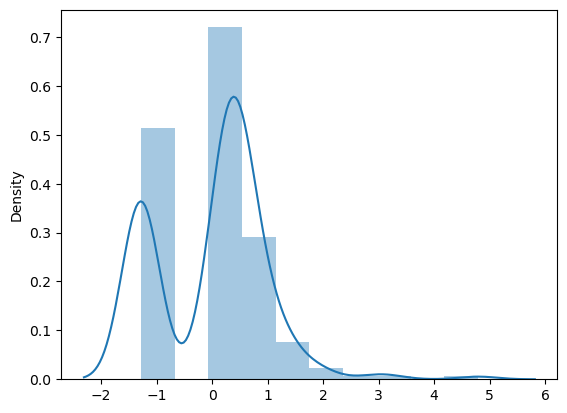

In [16]:
std_norm(dataset['salary'])

Positive Z-score shows that the value is above the mean and the salary with Z-Score>0 implies that the said student's salary is above average.
Negative Z-Score shows that the value is below the mean and the salary with Z-Score<0 implies that the said student's salary is below average.
Zero Z-score shows that the value is exactly at the mean and the salary with Z-Score=0 implies that the said student's salary is average.

10. What is the probability density function of the salary range from 700000 to 900000

In [17]:
def get_pdf_probability(dataset,startrange,endrange):
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'brown'},color='green')
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')
    sample=dataset
    sample_mean=dataset.mean()
    sample_std=dataset.std()
    norm_dist=norm(sample_mean,sample_std)
    values=[]
    probabilities=[]
    for value in range(startrange,endrange):
        values.append(value)
    for value in values:
        pdf=norm_dist.pdf(value)
        probabilities.append(pdf)
        prob=sum(probabilities)
    print("The probability for the range ({},{}) is {}".format(startrange,endrange,prob))
    return prob

The probability for the range (700000,900000) is 0.0005973310593974901


0.0005973310593974901

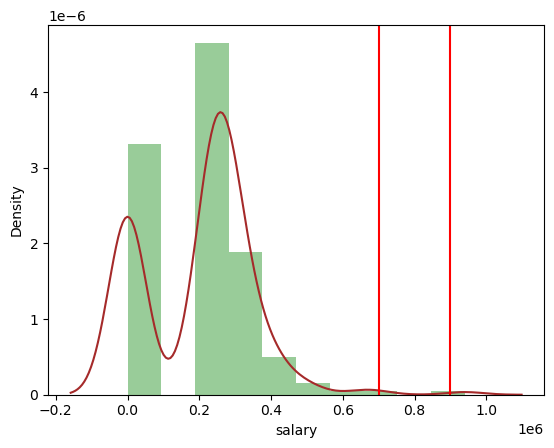

In [18]:
get_pdf_probability(dataset['salary'],700000,900000)

The probability of Student's salary in the range between 700000 and 900000 will be only 0.05% chance.

11. Test the similarity between the degree_t(Sci&Tech) with respect to etest_p and mba_p at significance level of 5%

In [19]:
from scipy.stats import ttest_rel
etest=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest,mba)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

pValue is greater than 0.05. In this case, the result is not statistically significant and We have to accept the null hypothesis.
The observed difference is due to random chance and not the original difference between the groups.

12. Which parameter is highly correlated with salary

In [20]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Out of all, the parameter ssc_p is highly correlated with salary. 
However, the relation between ssc_p and salary is only 54% which indicates a low degree of positive correlation.
There is a minimal positive relationship between the two variables. Hence we cannot define any significant conclusion about the relationship.